In [51]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
AUTO = tf.data.experimental.AUTOTUNE

In [2]:
basic = Sequential([
                    Dense(units = 1 , input_shape = [1])
])
basic.compile(optimizer = tf.keras.optimizers.Adam(0.01),loss = tf.keras.losses.mean_squared_error)

x = tf.constant([-1.0, 0.0, 1.0,2.0, 3.0 ,4.0] ,dtype = tf.float32)
y = tf.constant([-3.0, -1.0 , 1.0 , 3.0 , 5.0 , 7.0],dtype= tf.float32)

basic.fit(x,y ,epochs = 1050,verbose = False)

print(basic.predict([10.0])) # 2x -1 


[[19.000002]]


In [6]:
## What neural network learn

FirstLayer = Dense(units = 1 , input_shape = [1])

basic = Sequential([FirstLayer])
basic.compile(loss = tf.keras.losses.mean_squared_error,
              optimizer = tf.keras.optimizers.Adam(0.01))

x = tf.constant([-1.0, 0.0, 1.0,2.0, 3.0 ,4.0] ,dtype = tf.float32)
y = tf.constant([-3.0, -1.0 , 1.0 , 3.0 , 5.0 , 7.0],dtype= tf.float32)

basic.fit(x,y ,epochs = 1050,verbose = False)

print("The Weights {}".format(FirstLayer.get_weights()))


The Weights [array([[1.9999982]], dtype=float32), array([-0.999997], dtype=float32)]


In [21]:
data = tf.keras.datasets.fashion_mnist

(training_imgs, training_labels), (test_imgs, test_labels) = data.load_data()

print(training_imgs[:2])
training_imgs = training_imgs / 255.0
test_imgs = test_imgs / 255.0

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [22]:
from tensorflow.keras.utils import to_categorical
training_labels, test_labels = to_categorical(training_labels,10) , to_categorical(test_labels, 10)

In [56]:
training_imgs, test_imgs = tf.convert_to_tensor(training_imgs) , tf.convert_to_tensor(test_imgs)
TrainDataset , TestDataset = (tf.data.Dataset.from_tensor_slices((training_imgs,training_labels)).
                              batch(32).prefetch(AUTO)), tf.data.Dataset.from_tensor_slices((test_imgs,test_labels))
TrainDataset.element_spec

(TensorSpec(shape=(None, 28, 28), dtype=tf.float64, name=None),
 TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))

In [57]:
# Using sequential 
modelSeq = Sequential([
                       tf.keras.layers.Flatten(input_shape=[28, 28]),
                       tf.keras.layers.Dense(units = 256, activation = tf.nn.relu),
                       tf.keras.layers.Dense(units = 128,activation = tf.nn.leaky_relu),
                       tf.keras.layers.Dropout(0.2),
                       tf.keras.layers.Dense(10, activation = tf.nn.softmax)
                       
                       ])

# Using Functional Api
from tensorflow.keras import Model

inputlayer = tf.keras.layers.Input(shape=(28, 28))
layer = tf.keras.layers.Flatten()(inputlayer)
layer = tf.keras.layers.Dense(units = 256, activation = tf.nn.relu)(layer)
layer = tf.keras.layers.Dense(units = 128, activation = tf.nn.leaky_relu)(layer)
layer = tf.keras.layers.Dropout(0.2)(layer)
layer = tf.keras.layers.Dense(units = 10, activation= tf.nn.softmax)(layer)


modelFunc = Model(inputs=[inputlayer], outputs = layer)


METRICS =[
          tf.keras.metrics.TrueNegatives(name="TN"),
          tf.keras.metrics.FalseNegatives(name= "FN"),
          tf.keras.metrics.TruePositives(name="TP"),
          tf.keras.metrics.FalsePositives(name="FP"),
          tf.keras.metrics.CategoricalAccuracy(name="acc")
]

modelSeq.compile(metrics=METRICS, optimizer= tf.keras.optimizers.Adam(0.01),
                 loss = tf.keras.losses.CategoricalCrossentropy())

modelFunc.compile(metrics=METRICS, optimizer= tf.keras.optimizers.Adam(0.01),
                 loss = tf.keras.losses.CategoricalCrossentropy())




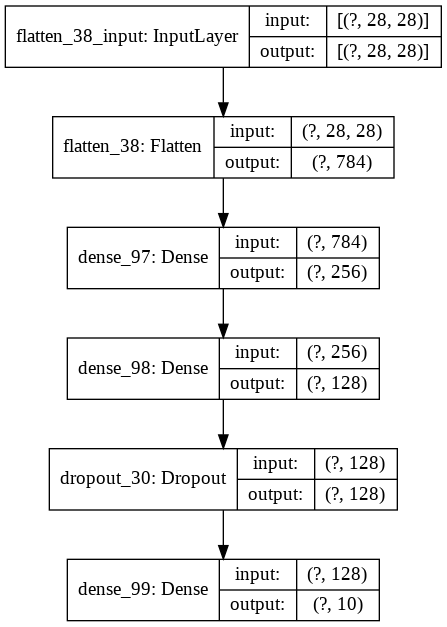

In [58]:
from tensorflow.keras.utils import plot_model
plot_model(modelSeq, show_shapes=True)

In [60]:
modelSeq.fit(TrainDataset,epochs=5,verbose=False)


print("Udah yang FunctionalAPi")
modelFunc.fit(TrainDataset,epochs=5,verbose=False)


Udah yang FunctionalAPi


In [61]:
modelSeq.evaluate(test_imgs,test_labels)

modelFunc.evaluate(test_imgs,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4862 - TN: 89141.0000 - FN: 2196.0000 - TP: 7804.0000 - FP: 859.0000 - acc: 0.8361


[0.48615503311157227, 89141.0, 2196.0, 7804.0, 859.0, 0.8360999822616577]